In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib.numpy_pickle as joblib
import torch
import torch.nn as nn
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import autoencoder_functions
import seperate_spec_and_features
import create_padded_spectograms
import normalize_padded_spectograms
import os

True
Using device: cuda


In [2]:
#shank3
spectograms_file = 'shank3USVs_many_properties.jl'
usvs = joblib.load(spectograms_file)
spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path = seperate_spec_and_features.separate_spec_and_features(usvs)
folder = 'multiple_models_shank3'
latent_sizes = [2,4,6,8,16,24,32,40,48,56,64,96,128]
name_list =[]
test_loss_list = []
reconstruction_loss_list = []
KLD_loss_list = []
for i in range(5): 
    for j in latent_sizes:
        model_name = f'shank3_{j}_v{i}'
        name = os.path.join(folder, model_name)
        latent_space_size = j
        slope_leaky = 0.1
        VAE_model = autoencoder_functions.VAE_KL_leaky(z_dim = latent_space_size, device_name='cuda',slope=slope_leaky)
        VAE_model = VAE_model.to(device)
        VAE_model.load_state_dict(torch.load(name + '/model.pt', map_location=device))

        # # load test spec indices 
        spec_indices_test = torch.load(name + '/spec_indices_test')
        # # load test data
        spec_sorted_test = [spec[i] for i in spec_indices_test]
        # #pad spectograms
        spec_sorted_test_padded = create_padded_spectograms.pad_spectograms_sorted(spec_sorted_test,160)
        # #normalize spectograms
        spec_sorted_test_normalized = normalize_padded_spectograms.normalize_specs(spec_sorted_test_padded, max_value_per_spec=True)
        # print(np.shape(spec_sorted_test_normalized))

        # #create torch tensor and test loader
        spec_sorted_test_normalized_tensor = torch.tensor(spec_sorted_test_normalized, dtype=torch.float32).to(device)
        test_dataset = torch.utils.data.TensorDataset(spec_sorted_test_normalized_tensor)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

        # #calculate test loss
        test_loss_strain, reconstruction_loss_strain, KLD_loss_strain = VAE_model.test_epoch(test_loader)
        name_list.append(model_name)
        test_loss_list.append(test_loss_strain)
        reconstruction_loss_list.append(reconstruction_loss_strain)
        KLD_loss_list.append(KLD_loss_strain)
        
print(len(name_list))
print(len(test_loss_list))
all_names = []
all_losses =[]
all_reconstruction_losses = []
all_KLD_losses = []

for i in range(len(latent_sizes)):
    name = name_list[i::(len(latent_sizes))]
    loss = test_loss_list[i::(len(latent_sizes))]
    reconstruction = reconstruction_loss_list[i::(len(latent_sizes))]
    KLD = KLD_loss_list[i::(len(latent_sizes))]
    all_names.append(name)
    all_losses.append(loss)
    all_reconstruction_losses.append(reconstruction)
    all_KLD_losses.append(KLD)
print(all_names)
print(all_losses)
mean = []
std = []
mean_reconstruction = []
std_reconstruction = []
mean_KLD = []
std_KLD = []
for i in range(len(latent_sizes)):
    mean_i = np.mean(all_losses[i])
    std_i = np.std(all_losses[i])
    mean_reconstruction_i = np.mean(all_reconstruction_losses[i])
    std_reconstruction_i = np.std(all_reconstruction_losses[i])
    mean_KLD_i = np.mean(all_KLD_losses[i])
    std_KLD_i = np.std(all_KLD_losses[i])
    mean.append(mean_i)
    std.append(std_i)
    mean_reconstruction.append(mean_reconstruction_i)
    std_reconstruction.append(std_reconstruction_i)
    mean_KLD.append(mean_KLD_i)
    std_KLD.append(std_KLD_i)
                               

print(mean)

c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###
C:\Users\ruben\AppData\Local\Temp\ipykernel_19252\2184916415.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend 

Test loss: 200.3223
Test reconstruction loss: 193.2739
Test KLD: 7.0484


c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###


Test loss: 183.0007
Test reconstruction loss: 172.3646
Test KLD: 10.6361
Test loss: 181.0982
Test reconstruction loss: 170.6115
Test KLD: 10.4868
Test loss: 176.2942
Test reconstruction loss: 164.7105
Test KLD: 11.5836
Test loss: 187.4413
Test reconstruction loss: 177.2756
Test KLD: 10.1657
Test loss: 185.8556
Test reconstruction loss: 174.8414
Test KLD: 11.0142
Test loss: 181.5259
Test reconstruction loss: 169.5050
Test KLD: 12.0209
Test loss: 186.0928
Test reconstruction loss: 175.6503
Test KLD: 10.4425
Test loss: 182.5629
Test reconstruction loss: 170.9094
Test KLD: 11.6535
Test loss: 181.7289
Test reconstruction loss: 170.9679
Test KLD: 10.7610
Test loss: 178.8077
Test reconstruction loss: 167.1878
Test KLD: 11.6199
Test loss: 185.8097
Test reconstruction loss: 175.1596
Test KLD: 10.6501
Test loss: 175.7240
Test reconstruction loss: 164.0043
Test KLD: 11.7197
Test loss: 200.3932
Test reconstruction loss: 193.2027
Test KLD: 7.1905
Test loss: 186.8053
Test reconstruction loss: 176.40

In [3]:
#pups
spectograms_file = 'emitter_and_specs.jl'
emitters = joblib.load(spectograms_file)
spec, emitter = seperate_spec_and_features.seperate_spec_and_emitter_pups(emitters)
folder = 'multiple_models_pups'
latent_sizes = [2,4,6,8,16,24,32,40,48,56,64,96,128]
name_list =[]
test_loss_list = []
reconstruction_loss_list = []
KLD_loss_list = []
for i in range(5): 
    for j in latent_sizes:
        model_name = f'pups_{j}_v{i}'
        name = os.path.join(folder, model_name)
        latent_space_size = j
        slope_leaky = 0.1
        VAE_model = autoencoder_functions.VAE_KL_leaky(z_dim = latent_space_size, device_name='cuda',slope=slope_leaky)
        VAE_model = VAE_model.to(device)
        VAE_model.load_state_dict(torch.load(name + '/model.pt', map_location=device))

        # # load test spec indices 
        spec_indices_test = torch.load(name + '/spec_indices_test')
        # # load test data
        spec_sorted_test = [spec[i] for i in spec_indices_test]
        # #pad spectograms
        spec_sorted_test_padded = create_padded_spectograms.pad_spectograms_sorted(spec_sorted_test,160)
        # #normalize spectograms
        spec_sorted_test_normalized = normalize_padded_spectograms.normalize_specs(spec_sorted_test_padded, max_value_per_spec=True)
        # print(np.shape(spec_sorted_test_normalized))

        # #create torch tensor and test loader
        spec_sorted_test_normalized_tensor = torch.tensor(spec_sorted_test_normalized, dtype=torch.float32).to(device)
        test_dataset = torch.utils.data.TensorDataset(spec_sorted_test_normalized_tensor)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

        # #calculate test loss
        test_loss_strain, reconstruction_loss_strain, KLD_loss_strain = VAE_model.test_epoch(test_loader)
        name_list.append(model_name)
        test_loss_list.append(test_loss_strain)
        reconstruction_loss_list.append(reconstruction_loss_strain)
        KLD_loss_list.append(KLD_loss_strain)
        
print(len(name_list))
print(len(test_loss_list))
all_names = []
all_losses =[]
all_reconstruction_losses = []
all_KLD_losses = []

for i in range(len(latent_sizes)):
    name = name_list[i::(len(latent_sizes))]
    loss = test_loss_list[i::(len(latent_sizes))]
    reconstruction = reconstruction_loss_list[i::(len(latent_sizes))]
    KLD = KLD_loss_list[i::(len(latent_sizes))]
    all_names.append(name)
    all_losses.append(loss)
    all_reconstruction_losses.append(reconstruction)
    all_KLD_losses.append(KLD)
print(all_names)
print(all_losses)

mean2 = []
std2 = []
mean_reconstruction2 = []
std_reconstruction2 = []
mean_KLD2 = []
std_KLD2 = []
for i in range(len(latent_sizes)):
    mean_i = np.mean(all_losses[i])
    std_i = np.std(all_losses[i])
    mean_reconstruction_i = np.mean(all_reconstruction_losses[i])
    std_reconstruction_i = np.std(all_reconstruction_losses[i])
    mean_KLD_i = np.mean(all_KLD_losses[i])
    std_KLD_i = np.std(all_KLD_losses[i])
    mean2.append(mean_i)
    std2.append(std_i)
    mean_reconstruction2.append(mean_reconstruction_i)
    std_reconstruction2.append(std_reconstruction_i)
    mean_KLD2.append(mean_KLD_i)
    std_KLD2.append(std_KLD_i)

C:\Users\ruben\AppData\Local\Temp\ipykernel_19252\3253630805.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  VAE_model.load_state_dict(torch.load(name + '/model.pt', ma

Test loss: 238.3410
Test reconstruction loss: 231.3825
Test KLD: 6.9585
Test loss: 204.3256
Test reconstruction loss: 193.7952
Test KLD: 10.5304
Test loss: 204.4037
Test reconstruction loss: 193.7246
Test KLD: 10.6792
Test loss: 202.9408
Test reconstruction loss: 190.5794
Test KLD: 12.3613
Test loss: 210.0132
Test reconstruction loss: 199.0054
Test KLD: 11.0078
Test loss: 213.7040
Test reconstruction loss: 201.4540
Test KLD: 12.2500
Test loss: 208.3509
Test reconstruction loss: 197.4812
Test KLD: 10.8697
Test loss: 201.8466
Test reconstruction loss: 190.1777
Test KLD: 11.6689
Test loss: 209.7911
Test reconstruction loss: 198.9229
Test KLD: 10.8682
Test loss: 204.4131
Test reconstruction loss: 193.8011
Test KLD: 10.6120
Test loss: 211.3088
Test reconstruction loss: 200.3050
Test KLD: 11.0038
Test loss: 214.5600
Test reconstruction loss: 203.9342
Test KLD: 10.6258
Test loss: 208.9095
Test reconstruction loss: 197.6419
Test KLD: 11.2675
Test loss: 245.6924
Test reconstruction loss: 238.72

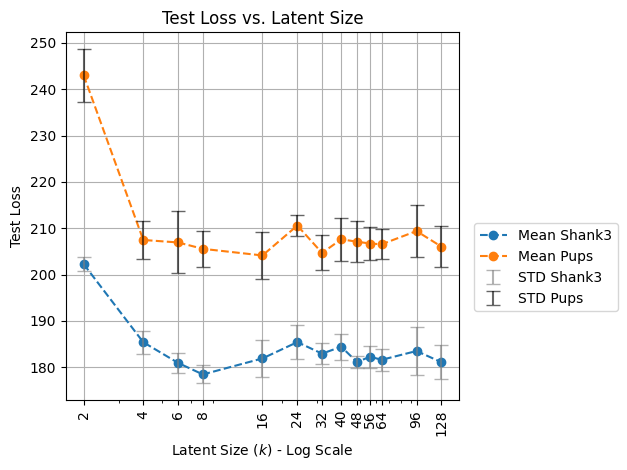

[2, 4, 6, 8, 16, 24, 32, 40, 48, 56, 64, 96, 128] [202.2563465463539, 185.40984200337408, 180.93688523441006, 178.45762608127242, 181.90845225285534, 185.43046657401956, 182.94449802613747, 184.43279005381243, 181.1467977015805, 182.27539850380168, 181.61203428176873, 183.51217444995888, 181.1070049045723]
[2, 4, 6, 8, 16, 24, 32, 40, 48, 56, 64, 96, 128] [242.99903681615865, 207.46978260608134, 206.93073826851682, 205.55551741011806, 204.12519934466678, 210.5788428406403, 204.66843318310566, 207.61365806306026, 207.09407997449125, 206.69852519078518, 206.53908967291346, 209.38762947146074, 206.0550251497561]


In [4]:
#plot
plt.figure()
plt.plot(latent_sizes, mean, marker = 'o', linestyle = '--', color = 'C0', label = 'Mean Shank3')
plt.errorbar(latent_sizes, mean,yerr = std, fmt = 'none', capsize = 5, color = 'gray', alpha = 0.6, label = 'STD Shank3')
plt.plot(latent_sizes, mean2, marker = 'o', linestyle = '--', color = 'C1', label = 'Mean Pups')
plt.errorbar(latent_sizes, mean2,yerr = std2, fmt = 'none', capsize = 5, color = 'black', alpha = 0.6, label = 'STD Pups')
plt.title('Test Loss vs. Latent Size')
plt.xlabel('Latent Size ($k$) - Log Scale')
plt.ylabel('Test Loss')
plt.legend(
    loc='upper left',           # Tells Matplotlib to anchor the legend's upper-left corner
    bbox_to_anchor=(1.02, 0.5)    # Anchor point is just outside the top-right corner of the plot
)
plt.xscale('log')
plt.grid()
# plt.xticks(latent_sizes)
plt.xticks(latent_sizes, labels=[str(s) for s in latent_sizes], rotation=90)
plt.tight_layout()
plt.show()
print(latent_sizes,mean)
print(latent_sizes,mean2)

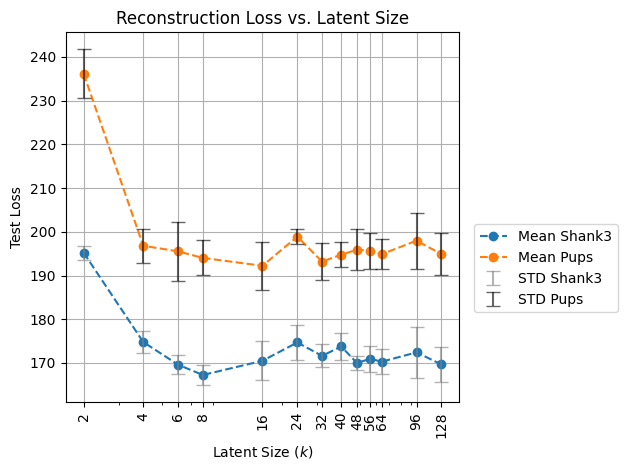

In [5]:
#plot
plt.figure()
plt.plot(latent_sizes, mean_reconstruction, marker = 'o', linestyle = '--', color = 'C0', label = 'Mean Shank3')
plt.errorbar(latent_sizes, mean_reconstruction,yerr = std_reconstruction, fmt = 'none', capsize = 5, color = 'gray', alpha = 0.6, label = 'STD Shank3')
plt.plot(latent_sizes, mean_reconstruction2, marker = 'o', linestyle = '--', color = 'C1', label = 'Mean Pups')
plt.errorbar(latent_sizes, mean_reconstruction2,yerr = std_reconstruction2, fmt = 'none', capsize = 5, color = 'black', alpha = 0.6, label = 'STD Pups')
plt.title('Reconstruction Loss vs. Latent Size')
plt.xlabel('Latent Size ($k$)')
plt.ylabel('Test Loss')
plt.legend(
    loc='upper left',           # Tells Matplotlib to anchor the legend's upper-left corner
    bbox_to_anchor=(1.02, 0.5)    # Anchor point is just outside the top-right corner of the plot
)
plt.xscale('log')
plt.grid()
# plt.xticks(latent_sizes)
plt.xticks(latent_sizes, labels=[str(s) for s in latent_sizes], rotation=90)
plt.tight_layout()
plt.show()

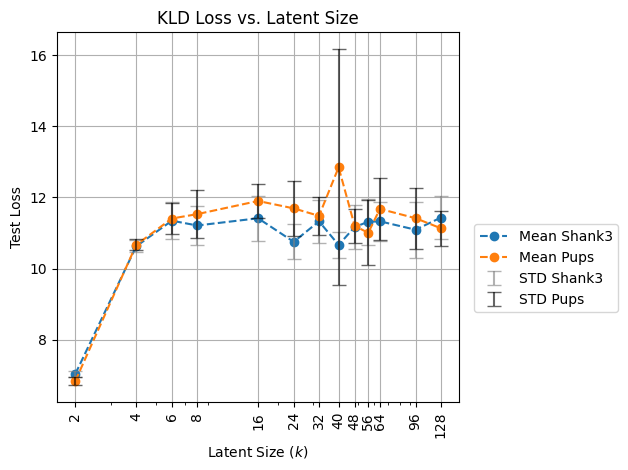

In [6]:
#plot
plt.figure()
plt.plot(latent_sizes, mean_KLD, marker = 'o', linestyle = '--', color = 'C0', label = 'Mean Shank3')
plt.errorbar(latent_sizes, mean_KLD,yerr = std_KLD, fmt = 'none', capsize = 5, color = 'gray', alpha = 0.6, label = 'STD Shank3')
plt.plot(latent_sizes, mean_KLD2, marker = 'o', linestyle = '--', color = 'C1', label = 'Mean Pups')
plt.errorbar(latent_sizes, mean_KLD2,yerr = std_KLD2, fmt = 'none', capsize = 5, color = 'black', alpha = 0.6, label = 'STD Pups')
plt.title('KLD Loss vs. Latent Size')
plt.xlabel('Latent Size ($k$)')
plt.ylabel('Test Loss')
plt.legend(
    loc='upper left',           # Tells Matplotlib to anchor the legend's upper-left corner
    bbox_to_anchor=(1.02, 0.5)    # Anchor point is just outside the top-right corner of the plot
)
plt.xscale('log')
plt.grid()
# plt.xticks(latent_sizes)
plt.xticks(latent_sizes, labels=[str(s) for s in latent_sizes], rotation=90)
plt.tight_layout()
plt.show()